In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_pickle('data/pickles/carpols_15min_normalized.pkl')
print('{} échantillons'.format(str(len(df))))
df.head()

19039 échantillons


,date,humidity,temperature,pressure,t_grad,so2_ref,h2s_ref,h2s,captor_id
0,2016-05-23 08:15:00,-1.622487,1.003809,0.053035,NaN,0.0,0.0,7.6,1303
1,2016-05-23 08:30:00,-1.622487,1.003809,0.053035,NaN,0.0,0.0,14.1,1303
2,2016-05-23 08:45:00,-1.622487,1.003809,0.053035,NaN,0.0,0.0,14.9,1303
3,2016-05-23 09:00:00,-1.622487,1.003809,0.053035,NaN,0.0,0.0,15.0,1303
4,2016-05-23 09:15:00,-1.622487,1.003809,0.053035,NaN,0.0,0.0,14.9,1303


In [3]:
def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

def dataframe_to_xy_with_ref(df):
    return (np.array(df[['h2s_ref', 'pressure', 'temperature', 'humidity', 't_grad', 'h2s']]),\
            np.array(df['so2_ref']))

def dataframe_to_xy_without_ref(df):
    return (np.array(df[['pressure', 'temperature', 'humidity', 't_grad', 'h2s']]),\
            np.array(df['so2_ref']))

df = df.reset_index()
df = df[pd.notnull(df).all(axis=1)]
df = df.reindex(np.random.permutation(df.index))
print('{} échantillons'.format(str(len(df))))

14936 échantillons


In [4]:
df_test, df_train = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

In [5]:
df_train.head()

,index,date,humidity,temperature,pressure,t_grad,so2_ref,h2s_ref,h2s,captor_id
18599,18599,2016-11-01 23:45:00,0.842050,-0.907186,0.670891,-0.102774,0.4,0.4,0.0,1304
5296,5296,2016-06-12 13:45:00,0.708832,-0.038552,-1.337140,-0.189469,0.0,0.0,6.9,1304
16005,16005,2016-10-05 09:15:00,-0.290305,-0.733459,1.288746,-1.229803,4.1,0.9,3.7,1304
10904,10904,2016-08-11 22:45:00,0.442395,-0.212279,1.134282,-0.016080,0.8,0.1,0.9,1304
2537,2537,2016-06-18 22:15:00,0.309177,-0.559732,1.134282,-0.189469,0.0,0.0,7.3,1303


## Learning

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

def baseline_model(dense_size, input_dim, loss_function, optimizer):
    # create model
    model = Sequential()
    model.add(Dense(dense_size, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss=loss_function, optimizer=optimizer)
    model.summary()
    return model

Using TensorFlow backend.


In [7]:
X_train, y_train = dataframe_to_xy_with_ref(df_train)
X_valid, y_valid = dataframe_to_xy_with_ref(df_valid)
X_test, y_test = dataframe_to_xy_with_ref(df_test)

In [8]:
model = baseline_model(32, X_train.shape[1], 'mse', 'adamax')
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
Train on 7468 samples, validate on 3734 samples
Epoch 1/1000
7468/7468 [==============================] - 1s - loss: 96.0086 - val_loss: 64.2290
Epoch 2/1000
7468/7468 [==============================] - 0s - loss: 90.4768 - val_loss: 60.6203
Epoch 3/1000
7468/7468 [==============================] - 0s - loss: 86.7749 - val_loss: 58.9030
Epoch 4/1000
7468/7468 [==============================] - 0s - loss: 84.4056 - val_loss: 57.4593
Epoch 5/1000
7468/7468 [==============================] - 0s - loss: 82.0973 - val_loss: 56.1142
Epoch 6

7468/7468 [==============================] - 0s - loss: 39.1821 - val_loss: 31.0195
Epoch 79/1000
7468/7468 [==============================] - 0s - loss: 38.9945 - val_loss: 30.8144
Epoch 80/1000
7468/7468 [==============================] - 0s - loss: 38.8387 - val_loss: 30.7688
Epoch 81/1000
7468/7468 [==============================] - 0s - loss: 38.6803 - val_loss: 30.6425
Epoch 82/1000
7468/7468 [==============================] - 0s - loss: 38.5792 - val_loss: 30.5581
Epoch 83/1000
7468/7468 [==============================] - 0s - loss: 38.3857 - val_loss: 30.3945
Epoch 84/1000
7468/7468 [==============================] - 0s - loss: 38.2825 - val_loss: 30.3010
Epoch 85/1000
7468/7468 [==============================] - 0s - loss: 38.1150 - val_loss: 30.2175
Epoch 86/1000
7468/7468 [==============================] - 0s - loss: 38.0494 - val_loss: 30.0604
Epoch 87/1000
7468/7468 [==============================] - 0s - loss: 37.8318 - val_loss: 29.9504
Epoch 88/1000
7468/7468 [=========

7468/7468 [==============================] - 0s - loss: 32.0971 - val_loss: 26.1709
Epoch 162/1000
7468/7468 [==============================] - 0s - loss: 32.0898 - val_loss: 26.1506
Epoch 163/1000
7468/7468 [==============================] - 0s - loss: 32.0141 - val_loss: 26.0959
Epoch 164/1000
7468/7468 [==============================] - 0s - loss: 31.8682 - val_loss: 26.0598
Epoch 165/1000
7468/7468 [==============================] - 0s - loss: 31.8407 - val_loss: 26.0472
Epoch 166/1000
7468/7468 [==============================] - 0s - loss: 31.8570 - val_loss: 26.0623
Epoch 167/1000
7468/7468 [==============================] - 0s - loss: 31.6880 - val_loss: 25.9363
Epoch 168/1000
7468/7468 [==============================] - 0s - loss: 31.6384 - val_loss: 25.9803
Epoch 169/1000
7468/7468 [==============================] - 0s - loss: 31.6452 - val_loss: 25.8999
Epoch 170/1000
7468/7468 [==============================] - 0s - loss: 31.5611 - val_loss: 25.8375
Epoch 171/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 28.0272 - val_loss: 23.9894
Epoch 244/1000
7468/7468 [==============================] - 0s - loss: 27.9717 - val_loss: 23.9622
Epoch 245/1000
7468/7468 [==============================] - 0s - loss: 27.9238 - val_loss: 23.9661
Epoch 246/1000
7468/7468 [==============================] - 0s - loss: 27.9100 - val_loss: 24.0258
Epoch 247/1000
7468/7468 [==============================] - 0s - loss: 27.8766 - val_loss: 23.9490
Epoch 248/1000
7468/7468 [==============================] - 0s - loss: 27.7624 - val_loss: 23.8717
Epoch 249/1000
7468/7468 [==============================] - 0s - loss: 27.7497 - val_loss: 23.8411
Epoch 250/1000
7468/7468 [==============================] - 0s - loss: 27.7389 - val_loss: 23.8324
Epoch 251/1000
7468/7468 [==============================] - 1s - loss: 27.6884 - val_loss: 23.8438
Epoch 252/1000
7468/7468 [==============================] - 0s - loss: 27.6178 - val_loss: 23.8099
Epoch 253/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 24.5124 - val_loss: 22.3251
Epoch 326/1000
7468/7468 [==============================] - 1s - loss: 24.4632 - val_loss: 22.3063
Epoch 327/1000
7468/7468 [==============================] - 1s - loss: 24.4441 - val_loss: 22.3384
Epoch 328/1000
7468/7468 [==============================] - 1s - loss: 24.4160 - val_loss: 22.3147
Epoch 329/1000
7468/7468 [==============================] - 0s - loss: 24.3596 - val_loss: 22.3272
Epoch 330/1000
7468/7468 [==============================] - 0s - loss: 24.3686 - val_loss: 22.3256
Epoch 331/1000
7468/7468 [==============================] - 0s - loss: 24.2715 - val_loss: 22.2253
Epoch 332/1000
7468/7468 [==============================] - 0s - loss: 24.2328 - val_loss: 22.2152
Epoch 333/1000
7468/7468 [==============================] - 0s - loss: 24.2376 - val_loss: 22.2047
Epoch 334/1000
7468/7468 [==============================] - 0s - loss: 24.1889 - val_loss: 22.3173
Epoch 335/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 22.4758 - val_loss: 21.4859
Epoch 408/1000
7468/7468 [==============================] - 0s - loss: 22.4552 - val_loss: 21.4313
Epoch 00407: early stopping


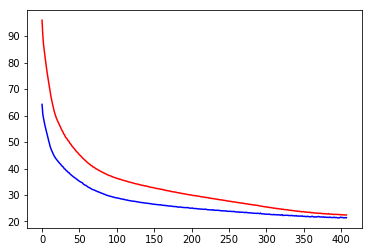

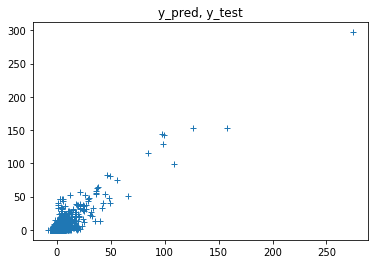

0.574712643678


In [11]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()
percent_high_detected = np.sum(y_pred.reshape((len(y_pred), )) > 20) / np.sum(y_test.reshape((len(y_test), )) > 20)
print(percent_high_detected)

In [12]:
X_train, y_train = dataframe_to_xy_without_ref(df_train)
X_valid, y_valid = dataframe_to_xy_without_ref(df_valid)
X_test, y_test = dataframe_to_xy_without_ref(df_test)

In [13]:
model = baseline_model(32, X_train.shape[1], 'mse', 'adamax')
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
Train on 7468 samples, validate on 3734 samples
Epoch 1/1000
7468/7468 [==============================] - 1s - loss: 94.3897 - val_loss: 63.6013
Epoch 2/1000
7468/7468 [==============================] - 0s - loss: 90.1100 - val_loss: 61.0053
Epoch 3/1000
7468/7468 [==============================] - 0s - loss: 86.1694 - val_loss: 58.8220
Epoch 4/1000
7468/7468 [==============================] - 0s - loss: 83.4774 - val_loss: 57.6226
Epoch 5/1000
7468/7468 [==============================] - 0s - loss: 81.5203 - val_loss: 56.8260
Epoch 6

7468/7468 [==============================] - 0s - loss: 48.4148 - val_loss: 39.6779
Epoch 79/1000
7468/7468 [==============================] - 0s - loss: 48.2389 - val_loss: 39.4880
Epoch 80/1000
7468/7468 [==============================] - 0s - loss: 48.1403 - val_loss: 39.4659
Epoch 81/1000
7468/7468 [==============================] - 0s - loss: 47.9849 - val_loss: 39.3114
Epoch 82/1000
7468/7468 [==============================] - 0s - loss: 47.7280 - val_loss: 39.2623
Epoch 83/1000
7468/7468 [==============================] - 0s - loss: 47.7288 - val_loss: 39.1118
Epoch 84/1000
7468/7468 [==============================] - 0s - loss: 47.4906 - val_loss: 38.8831
Epoch 85/1000
7468/7468 [==============================] - 0s - loss: 47.4111 - val_loss: 38.8639
Epoch 86/1000
7468/7468 [==============================] - 0s - loss: 47.1664 - val_loss: 38.8243
Epoch 87/1000
7468/7468 [==============================] - 0s - loss: 47.0068 - val_loss: 38.8250
Epoch 88/1000
7468/7468 [=========

7468/7468 [==============================] - 0s - loss: 41.0259 - val_loss: 33.7943
Epoch 162/1000
7468/7468 [==============================] - 0s - loss: 41.0097 - val_loss: 33.7575
Epoch 163/1000
7468/7468 [==============================] - 0s - loss: 41.0231 - val_loss: 33.7278
Epoch 164/1000
7468/7468 [==============================] - 0s - loss: 40.8997 - val_loss: 33.7087
Epoch 165/1000
7468/7468 [==============================] - 0s - loss: 40.9273 - val_loss: 33.6595
Epoch 166/1000
7468/7468 [==============================] - 0s - loss: 40.8935 - val_loss: 33.6510
Epoch 167/1000
7468/7468 [==============================] - 0s - loss: 40.8140 - val_loss: 33.6535
Epoch 168/1000
7468/7468 [==============================] - 0s - loss: 40.7574 - val_loss: 33.5950
Epoch 169/1000
7468/7468 [==============================] - 0s - loss: 40.7228 - val_loss: 33.5615
Epoch 170/1000
7468/7468 [==============================] - 0s - loss: 40.7023 - val_loss: 33.5568
Epoch 171/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 38.5971 - val_loss: 31.7599
Epoch 244/1000
7468/7468 [==============================] - 0s - loss: 38.5602 - val_loss: 31.7108
Epoch 245/1000
7468/7468 [==============================] - 0s - loss: 38.5058 - val_loss: 31.7090
Epoch 246/1000
7468/7468 [==============================] - 0s - loss: 38.4987 - val_loss: 31.6863
Epoch 247/1000
7468/7468 [==============================] - 0s - loss: 38.5241 - val_loss: 31.6526
Epoch 248/1000
7468/7468 [==============================] - 0s - loss: 38.4095 - val_loss: 31.6433
Epoch 249/1000
7468/7468 [==============================] - 0s - loss: 38.4177 - val_loss: 31.6331
Epoch 250/1000
7468/7468 [==============================] - 0s - loss: 38.3836 - val_loss: 31.6033
Epoch 251/1000
7468/7468 [==============================] - 0s - loss: 38.4440 - val_loss: 31.5713
Epoch 252/1000
7468/7468 [==============================] - 0s - loss: 38.3578 - val_loss: 31.5596
Epoch 253/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 37.1045 - val_loss: 30.6097
Epoch 326/1000
7468/7468 [==============================] - 0s - loss: 37.0907 - val_loss: 30.5989
Epoch 327/1000
7468/7468 [==============================] - 0s - loss: 37.0435 - val_loss: 30.5919
Epoch 328/1000
7468/7468 [==============================] - 0s - loss: 37.1215 - val_loss: 30.5505
Epoch 329/1000
7468/7468 [==============================] - 0s - loss: 37.0255 - val_loss: 30.5431
Epoch 330/1000
7468/7468 [==============================] - 0s - loss: 37.0500 - val_loss: 30.5317
Epoch 331/1000
7468/7468 [==============================] - 0s - loss: 36.9921 - val_loss: 30.5228
Epoch 332/1000
7468/7468 [==============================] - 0s - loss: 37.0228 - val_loss: 30.5081
Epoch 333/1000
7468/7468 [==============================] - 0s - loss: 36.9385 - val_loss: 30.5042
Epoch 334/1000
7468/7468 [==============================] - 0s - loss: 36.9759 - val_loss: 30.4842
Epoch 335/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 36.1063 - val_loss: 29.8469
Epoch 408/1000
7468/7468 [==============================] - 0s - loss: 36.1226 - val_loss: 29.8312
Epoch 409/1000
7468/7468 [==============================] - 0s - loss: 36.0770 - val_loss: 29.8434
Epoch 410/1000
7468/7468 [==============================] - 0s - loss: 36.1193 - val_loss: 29.8069
Epoch 411/1000
7468/7468 [==============================] - 0s - loss: 36.1366 - val_loss: 29.8051
Epoch 412/1000
7468/7468 [==============================] - 0s - loss: 36.1102 - val_loss: 29.7926
Epoch 413/1000
7468/7468 [==============================] - 0s - loss: 36.0630 - val_loss: 29.7977
Epoch 414/1000
7468/7468 [==============================] - 0s - loss: 36.0606 - val_loss: 29.7974
Epoch 415/1000
7468/7468 [==============================] - 0s - loss: 36.0063 - val_loss: 29.7577
Epoch 416/1000
7468/7468 [==============================] - 0s - loss: 36.0765 - val_loss: 29.7567
Epoch 417/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 35.3811 - val_loss: 29.2930
Epoch 490/1000
7468/7468 [==============================] - 0s - loss: 35.2863 - val_loss: 29.3089
Epoch 491/1000
7468/7468 [==============================] - 0s - loss: 35.4371 - val_loss: 29.2746
Epoch 492/1000
7468/7468 [==============================] - 0s - loss: 35.3472 - val_loss: 29.2664
Epoch 493/1000
7468/7468 [==============================] - 0s - loss: 35.3143 - val_loss: 29.2655
Epoch 494/1000
7468/7468 [==============================] - 0s - loss: 35.3148 - val_loss: 29.2726
Epoch 495/1000
7468/7468 [==============================] - 0s - loss: 35.3719 - val_loss: 29.2542
Epoch 496/1000
7468/7468 [==============================] - 0s - loss: 35.3229 - val_loss: 29.2526
Epoch 497/1000
7468/7468 [==============================] - 0s - loss: 35.2809 - val_loss: 29.2695
Epoch 498/1000
7468/7468 [==============================] - 0s - loss: 35.2900 - val_loss: 29.2543
Epoch 499/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 34.8011 - val_loss: 28.9384
Epoch 572/1000
7468/7468 [==============================] - 0s - loss: 34.7903 - val_loss: 28.9374
Epoch 573/1000
7468/7468 [==============================] - 0s - loss: 34.7806 - val_loss: 28.9218
Epoch 574/1000
7468/7468 [==============================] - 0s - loss: 34.7851 - val_loss: 28.9301
Epoch 575/1000
7468/7468 [==============================] - 0s - loss: 34.7066 - val_loss: 28.9598
Epoch 576/1000
7468/7468 [==============================] - 0s - loss: 34.7115 - val_loss: 28.9191
Epoch 577/1000
7468/7468 [==============================] - 0s - loss: 34.6736 - val_loss: 28.9264
Epoch 578/1000
7468/7468 [==============================] - 0s - loss: 34.6658 - val_loss: 28.9121
Epoch 579/1000
7468/7468 [==============================] - 0s - loss: 34.7301 - val_loss: 28.9148
Epoch 580/1000
7468/7468 [==============================] - 0s - loss: 34.6554 - val_loss: 28.9343
Epoch 581/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 34.1388 - val_loss: 28.7392
Epoch 654/1000
7468/7468 [==============================] - 0s - loss: 34.1811 - val_loss: 28.7344
Epoch 655/1000
7468/7468 [==============================] - 0s - loss: 34.2692 - val_loss: 28.7454
Epoch 656/1000
7468/7468 [==============================] - 0s - loss: 34.1720 - val_loss: 28.7285
Epoch 657/1000
7468/7468 [==============================] - 0s - loss: 34.2742 - val_loss: 28.7453
Epoch 658/1000
7468/7468 [==============================] - 0s - loss: 34.1547 - val_loss: 28.7253
Epoch 659/1000
7468/7468 [==============================] - 0s - loss: 34.1165 - val_loss: 28.7088
Epoch 660/1000
7468/7468 [==============================] - 0s - loss: 34.1884 - val_loss: 28.7421
Epoch 661/1000
7468/7468 [==============================] - 0s - loss: 34.1680 - val_loss: 28.6999
Epoch 662/1000
7468/7468 [==============================] - 0s - loss: 34.1401 - val_loss: 28.6954
Epoch 663/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 33.5686 - val_loss: 28.5329
Epoch 736/1000
7468/7468 [==============================] - 0s - loss: 33.6308 - val_loss: 28.5903
Epoch 737/1000
7468/7468 [==============================] - 0s - loss: 33.6450 - val_loss: 28.5390
Epoch 738/1000
7468/7468 [==============================] - 0s - loss: 33.5156 - val_loss: 28.5454
Epoch 739/1000
7468/7468 [==============================] - 0s - loss: 33.6621 - val_loss: 28.5506
Epoch 740/1000
7468/7468 [==============================] - 0s - loss: 33.4923 - val_loss: 28.5229
Epoch 741/1000
7468/7468 [==============================] - 0s - loss: 33.5190 - val_loss: 28.5264
Epoch 742/1000
7468/7468 [==============================] - 0s - loss: 33.5873 - val_loss: 28.6222
Epoch 743/1000
7468/7468 [==============================] - 0s - loss: 33.5651 - val_loss: 28.5481
Epoch 744/1000
7468/7468 [==============================] - 0s - loss: 33.4966 - val_loss: 28.5870
Epoch 745/1000
7468/7468 

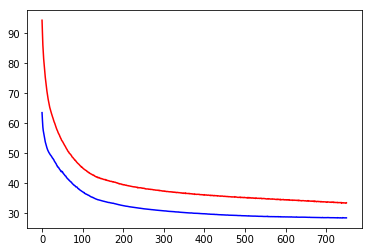

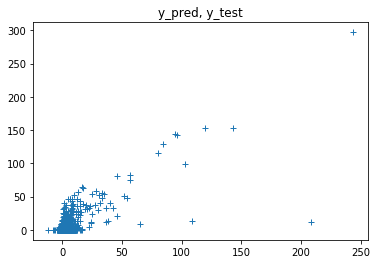

0.436781609195


In [14]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()
percent_high_detected = np.sum(y_pred.reshape((len(y_pred), )) > 20) / np.sum(y_test.reshape((len(y_test), )) > 20)
print(percent_high_detected)

In [15]:
def dataframe_to_xy_with_ref(df):
    return (np.array(df[['pressure', 'temperature', 'humidity', 't_grad', 'h2s']]),\
            np.array(df['so2_ref'] + df['h2s_ref']))

In [16]:
X_train, y_train = dataframe_to_xy_with_ref(df_train)
X_valid, y_valid = dataframe_to_xy_with_ref(df_valid)
X_test, y_test = dataframe_to_xy_with_ref(df_test)

In [17]:
model = baseline_model(32, X_train.shape[1], 'mse', 'adamax')
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
history = model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_valid, y_valid), callbacks=[early_stopping], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
Train on 7468 samples, validate on 3734 samples
Epoch 1/1000
7468/7468 [==============================] - 0s - loss: 96.2276 - val_loss: 65.6638
Epoch 2/1000
7468/7468 [==============================] - 0s - loss: 90.5221 - val_loss: 62.0023
Epoch 3/1000
7468/7468 [==============================] - 0s - loss: 86.3466 - val_loss: 60.0493
Epoch 4/1000
7468/7468 [==============================] - 0s - loss: 83.7474 - val_loss: 58.9604
Epoch 5/1000
7468/7468 [==============================] - 0s - loss: 81.9611 - val_loss: 58.2390
Epoch 6

7468/7468 [==============================] - 0s - loss: 39.7100 - val_loss: 33.6027
Epoch 79/1000
7468/7468 [==============================] - 0s - loss: 39.5867 - val_loss: 33.4938
Epoch 80/1000
7468/7468 [==============================] - 0s - loss: 39.5090 - val_loss: 33.4148
Epoch 81/1000
7468/7468 [==============================] - 0s - loss: 39.4195 - val_loss: 33.3202
Epoch 82/1000
7468/7468 [==============================] - 0s - loss: 39.2562 - val_loss: 33.2220
Epoch 83/1000
7468/7468 [==============================] - 0s - loss: 39.1546 - val_loss: 33.1767
Epoch 84/1000
7468/7468 [==============================] - 0s - loss: 39.1088 - val_loss: 33.0583
Epoch 85/1000
7468/7468 [==============================] - 0s - loss: 39.0208 - val_loss: 33.0839
Epoch 86/1000
7468/7468 [==============================] - 0s - loss: 39.0099 - val_loss: 33.0380
Epoch 87/1000
7468/7468 [==============================] - 0s - loss: 38.8490 - val_loss: 32.9080
Epoch 88/1000
7468/7468 [=========

7468/7468 [==============================] - 0s - loss: 35.7307 - val_loss: 29.9908
Epoch 162/1000
7468/7468 [==============================] - 0s - loss: 35.6994 - val_loss: 30.1277
Epoch 163/1000
7468/7468 [==============================] - 0s - loss: 35.6934 - val_loss: 30.0076
Epoch 164/1000
7468/7468 [==============================] - 0s - loss: 35.5633 - val_loss: 29.9908
Epoch 165/1000
7468/7468 [==============================] - 0s - loss: 35.6238 - val_loss: 30.0117
Epoch 166/1000
7468/7468 [==============================] - 0s - loss: 35.6084 - val_loss: 29.9469
Epoch 167/1000
7468/7468 [==============================] - 0s - loss: 35.5743 - val_loss: 29.9597
Epoch 168/1000
7468/7468 [==============================] - 0s - loss: 35.5301 - val_loss: 29.9327
Epoch 169/1000
7468/7468 [==============================] - 0s - loss: 35.5583 - val_loss: 29.8678
Epoch 170/1000
7468/7468 [==============================] - 0s - loss: 35.4660 - val_loss: 29.8422
Epoch 171/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 34.1580 - val_loss: 28.9139
Epoch 244/1000
7468/7468 [==============================] - 0s - loss: 34.1396 - val_loss: 28.8423
Epoch 245/1000
7468/7468 [==============================] - 0s - loss: 34.1097 - val_loss: 28.9292
Epoch 246/1000
7468/7468 [==============================] - 0s - loss: 34.1201 - val_loss: 28.8685
Epoch 247/1000
7468/7468 [==============================] - 0s - loss: 34.0515 - val_loss: 28.8337
Epoch 248/1000
7468/7468 [==============================] - 0s - loss: 34.0778 - val_loss: 28.8215
Epoch 249/1000
7468/7468 [==============================] - 0s - loss: 34.0633 - val_loss: 29.0664
Epoch 250/1000
7468/7468 [==============================] - 0s - loss: 34.0491 - val_loss: 28.7937
Epoch 251/1000
7468/7468 [==============================] - 0s - loss: 34.0387 - val_loss: 28.8140
Epoch 252/1000
7468/7468 [==============================] - 0s - loss: 33.9949 - val_loss: 28.7570
Epoch 253/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 33.1770 - val_loss: 28.3042
Epoch 326/1000
7468/7468 [==============================] - 0s - loss: 33.1409 - val_loss: 28.3382
Epoch 327/1000
7468/7468 [==============================] - 0s - loss: 33.1096 - val_loss: 28.3141
Epoch 328/1000
7468/7468 [==============================] - 0s - loss: 33.1596 - val_loss: 28.2394
Epoch 329/1000
7468/7468 [==============================] - 0s - loss: 33.1805 - val_loss: 28.4867
Epoch 330/1000
7468/7468 [==============================] - 0s - loss: 33.1645 - val_loss: 28.2222
Epoch 331/1000
7468/7468 [==============================] - 0s - loss: 33.1362 - val_loss: 28.2719
Epoch 332/1000
7468/7468 [==============================] - 0s - loss: 33.0801 - val_loss: 28.1936
Epoch 333/1000
7468/7468 [==============================] - 0s - loss: 33.0880 - val_loss: 28.2838
Epoch 334/1000
7468/7468 [==============================] - 0s - loss: 33.1115 - val_loss: 28.2657
Epoch 335/1000
7468/7468 

7468/7468 [==============================] - 0s - loss: 32.4662 - val_loss: 27.7401
Epoch 408/1000
7468/7468 [==============================] - 0s - loss: 32.4569 - val_loss: 27.7251
Epoch 409/1000
7468/7468 [==============================] - 0s - loss: 32.4405 - val_loss: 27.8358
Epoch 410/1000
7468/7468 [==============================] - 0s - loss: 32.4849 - val_loss: 27.7799
Epoch 411/1000
7468/7468 [==============================] - 0s - loss: 32.4309 - val_loss: 27.7416
Epoch 412/1000
7468/7468 [==============================] - 0s - loss: 32.4133 - val_loss: 27.7331
Epoch 413/1000
7468/7468 [==============================] - 0s - loss: 32.4161 - val_loss: 27.7451
Epoch 414/1000
7468/7468 [==============================] - 0s - loss: 32.2955 - val_loss: 27.7981
Epoch 415/1000
7468/7468 [==============================] - 0s - loss: 32.3842 - val_loss: 27.8023
Epoch 00414: early stopping


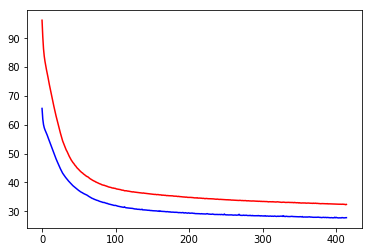

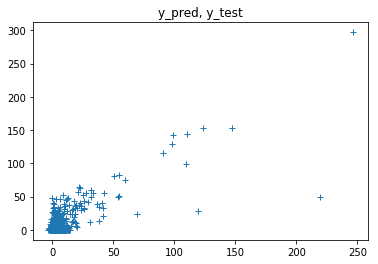

0.446808510638


In [18]:
y_pred = model.predict(X_test)
plt.plot(history.history['loss'], 'r-')
plt.plot(history.history['val_loss'], 'b-')
plt.show()

plt.title('y_pred, y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.show()
percent_high_detected = np.sum(y_pred.reshape((len(y_pred), )) > 20) / np.sum(y_test.reshape((len(y_test), )) > 20)
print(percent_high_detected)